In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.ndimage.morphology import binary_dilation,binary_erosion

In [17]:
floor_width = 7.90 #m
floor_height = 7.05 #m

In [18]:
floor_color = (255,133,0) # np.asarray([255,133,0])
start_pos_color = (0,255,0)
floor_delta = 7
start_pos_delta = 0

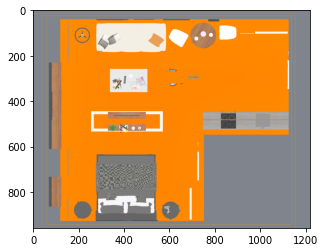

In [19]:
exported_map = np.asarray(Image.open("map/map_with_start.png"))[:,:,0:3]
plt.imshow(exported_map)

In [5]:
masks_floor = [np.logical_and(exported_map[:,:,i] <= floor_color[i] + floor_delta, exported_map[:,:,i] >= floor_color[i] - floor_delta) for i in range(3)]
masks_start = [np.logical_and(exported_map[:,:,i] <= start_pos_color[i] + start_pos_delta, exported_map[:,:,i] >= start_pos_color[i] - start_pos_delta) for i in range(3)]
map_occupied = np.logical_not(np.logical_or(np.logical_and(*masks_floor), np.logical_and(*masks_start)))

In [6]:
player_start = np.where(np.logical_and(*masks_start))
player_start_coord = player_start[0][0], player_start[1][0]

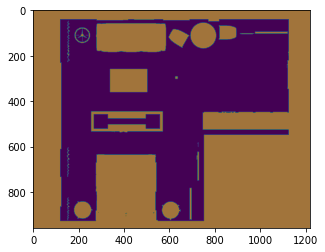

In [15]:
plt.imshow(map_occupied)
plt.imshow(binary_dilation(np.logical_and(*masks_start), structure = np.ones((10,10))), alpha = 0.5)

In [211]:
map_free = np.logical_not(map_occupied)

## Use Binary Dilation to make sure drone will never move too close to object boundaries

In [212]:
width_pixel = np.max(np.sum(map_free, axis = -1))
height_pixel = np.max(np.sum(map_free, axis = 0))

length_per_pixel = 1/2 * (floor_width/width_pixel + floor_height/height_pixel) 
map_width = map_free.shape[1]*length_per_pixel
map_height =  map_free.shape[0]*length_per_pixel
print("map shape [m]: ", map_height, map_width)

map shape [m]:  7.572986797050654 9.644095921087471


In [214]:
dilated = binary_dilation(map_occupied, structure = np.ones((50,50)))

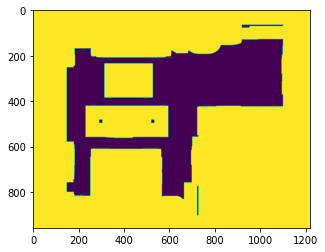

In [215]:
plt.imshow(dilated)

Number of objects is 5


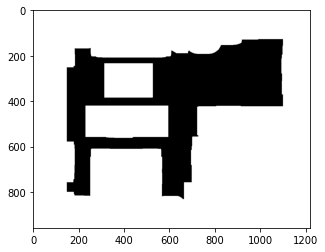

In [228]:
labeled, nr_objects = ndimage.label(np.logical_not(dilated) )
print("Number of objects is {}".format(nr_objects))
max_idx = np.argmax(np.asarray([np.sum(labeled == i) for i in range(1,nr_objects)])) + 1
final_free_map =  labeled == max_idx

final_free_map_pil = Image.fromarray(np.logical_not(final_free_map))
plt.imshow(final_free_map_pil)

In [ ]:
# Save a dictionary into a pickle file.
import pickle


In [37]:
# Save a dictionary into a pickle file.
import pickle
 
pickle.dump({'map': np.logical_not(final_free_map),
             'dimensions': {
                 'height': map_height,
                 'width':map_width,
                 'lengthPerPixel': length_per_pixel
             },
             'start': {
                 'top': player_start_coord[0],
                 'left': player_start_coord[1]
             }
            }, open( "map.pickle", "wb" ), protocol = 2 )
